In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics



In [9]:
df=pd.read_csv("C://Users//Yashwanth//Downloads//insurance.csv")

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.shape

(1338, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
#Checking for mising values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


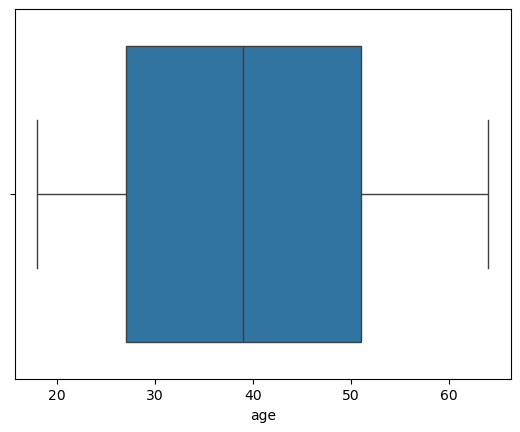

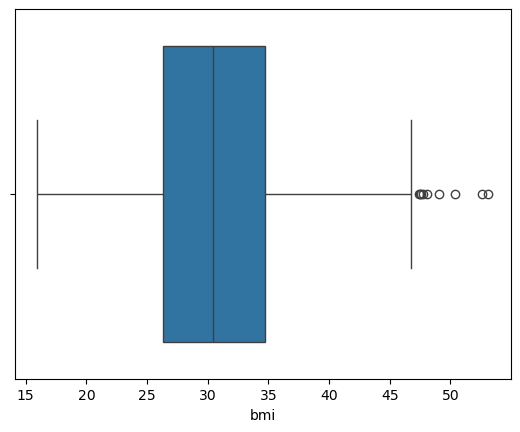

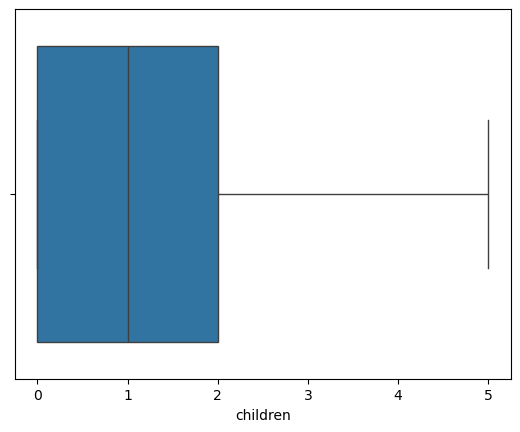

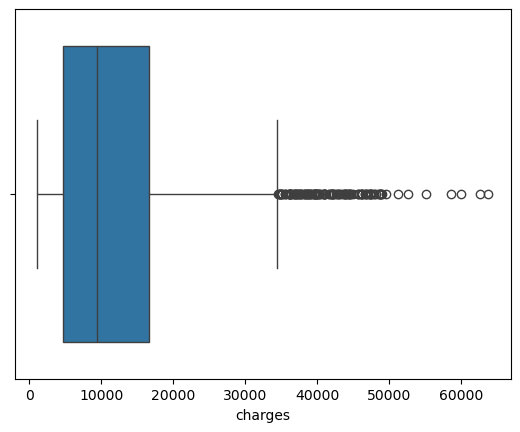

In [21]:
#Finding outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

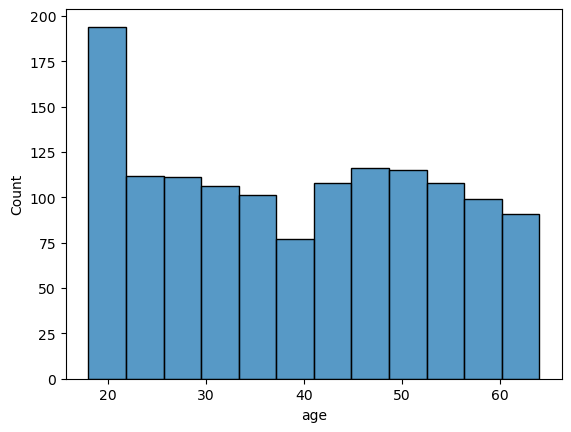

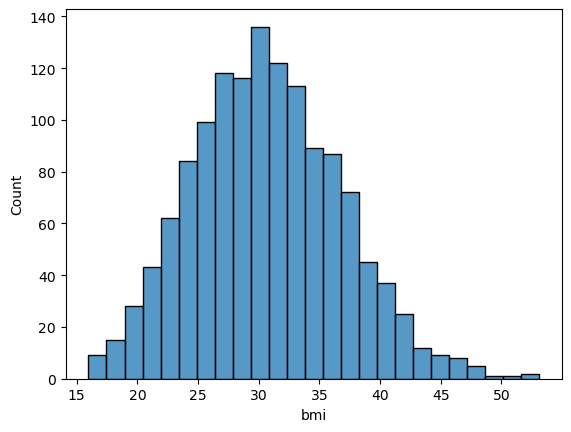

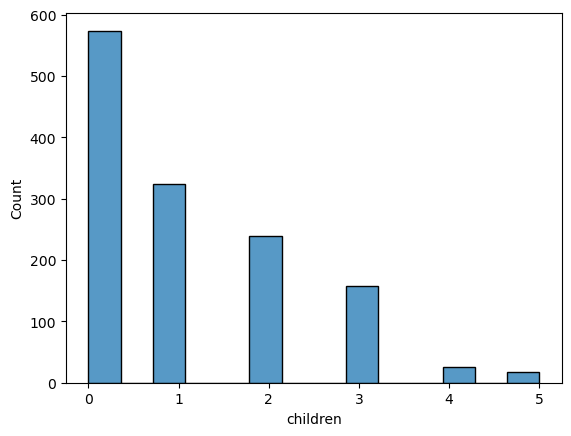

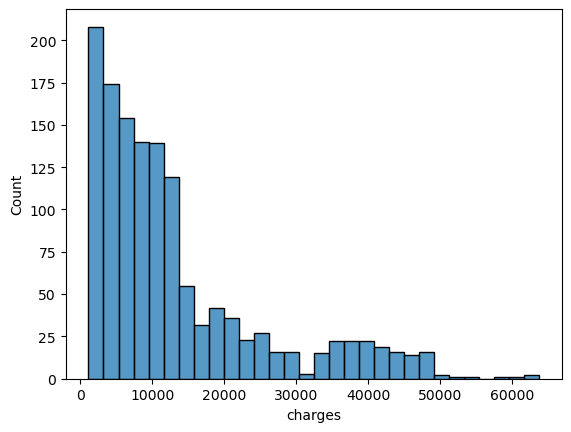

In [23]:
#Histogram to understand the distribution 
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()


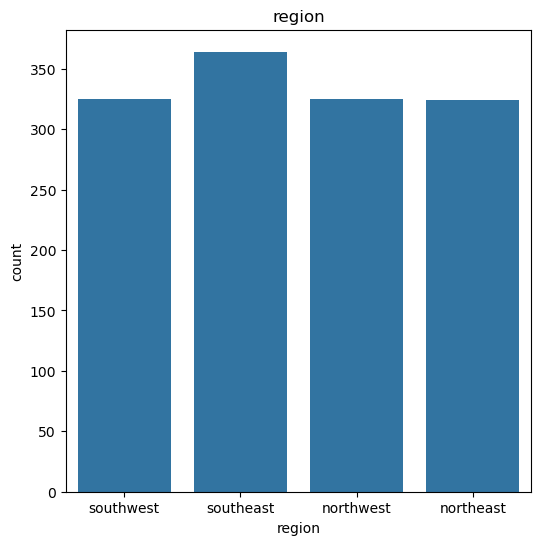

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

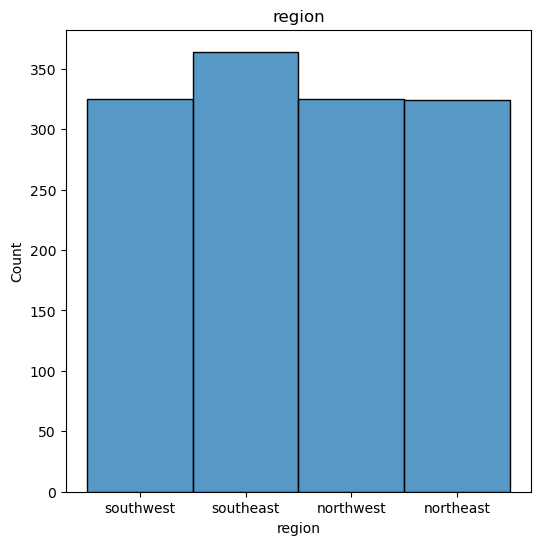

In [37]:
plt.figure(figsize=(6,6))
sns.histplot(x='region', data=df)
plt.title('region')
plt.show()

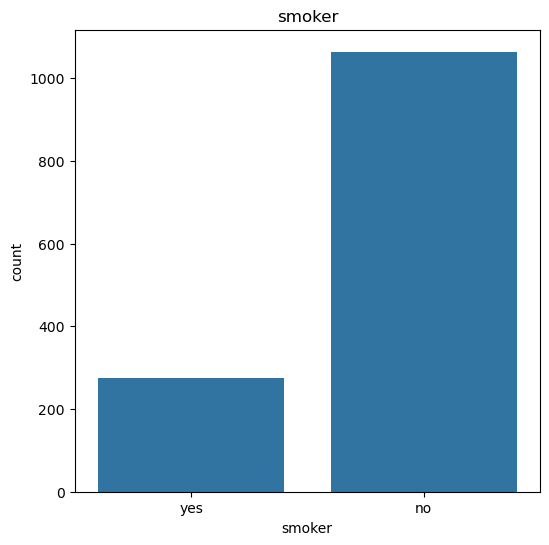

In [27]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

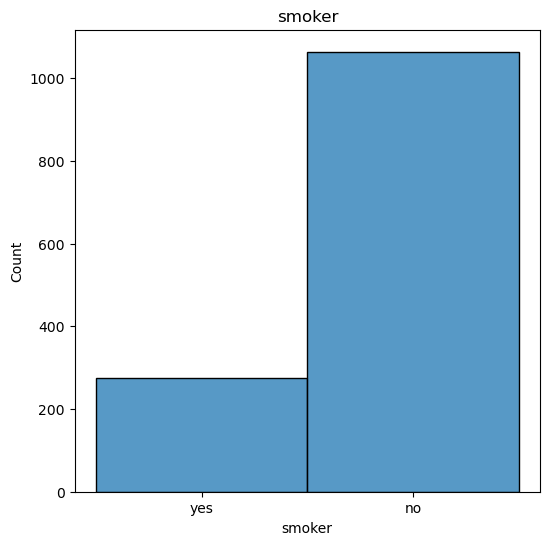

In [41]:
plt.figure(figsize=(6,6))
sns.histplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

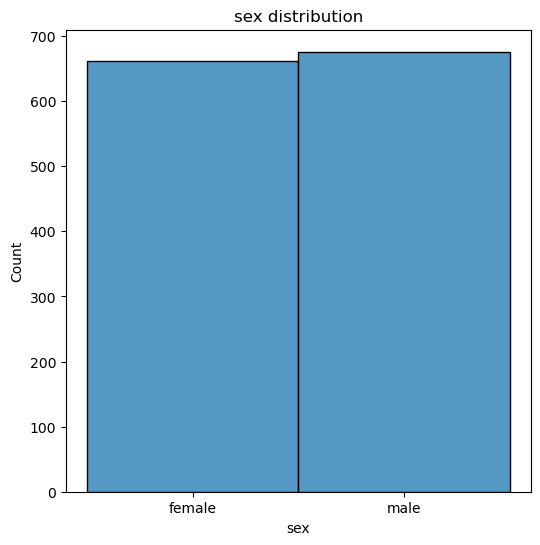

In [39]:
plt.figure(figsize=(6,6))
sns.histplot(x='sex', data=df)
plt.title('sex distribution')
plt.show()

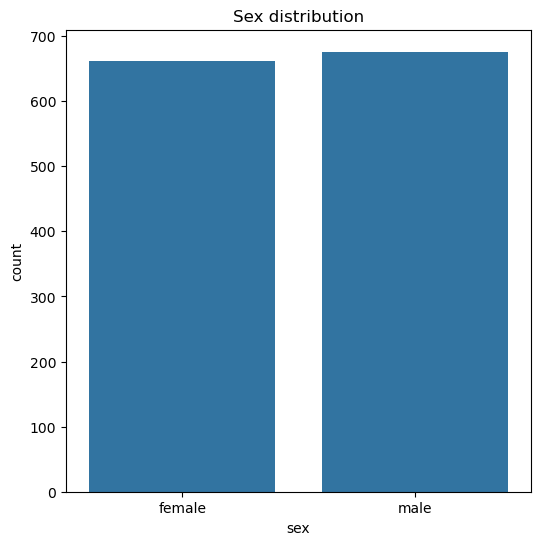

In [31]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex distribution')
plt.show()

In [43]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [45]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [47]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [49]:
#Encoding categorical data
#Encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

#Encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

#Encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\Yashwanth\AppData\Local\Temp\ipykernel_7328\328722152.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}}, inplace=True)
C:\Users\Yashwanth\AppData\Local\Temp\ipykernel_7328\328722152.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
C:\Users\Yashwanth\AppData\Local\Temp\ipykernel_7328\328722152.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behav

In [53]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [55]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [57]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [59]:
#Splittin the datset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [63]:
#Model Traininng
regressor=LinearRegression()

In [65]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [69]:
Y_pred=regressor.predict(X_test)

In [85]:
#Prediction on training data
tdp=regressor.predict(X_test)

In [91]:
#Building a new pridiction are finding solution for new data
ipd=(21,1,27.99,0,0,3)
ipd_as_array=np.asarray(ipd)
ipdreshape=ipd_as_array.reshape(1,-1)
prediction = regressor.predict(ipdreshape)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[26554.75268539]
The insurance cost is USD  26554.75268539459


C:\Users\Yashwanth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
